# Getting Started

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('./bank-full.csv', delimiter=';')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Preprocessing

In [5]:
y = data['y']
X = data.drop('y', axis=1)

In [6]:
def get_categorical_features(df):
    return [feature for feature in df.columns if df[feature].dtype == 'object']

In [7]:
get_categorical_features(X)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [8]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [9]:
get_uniques(X, get_categorical_features(X))

{'job': ['management',
  'technician',
  'entrepreneur',
  'blue-collar',
  'unknown',
  'retired',
  'admin.',
  'services',
  'self-employed',
  'unemployed',
  'housemaid',
  'student'],
 'marital': ['married', 'single', 'divorced'],
 'education': ['tertiary', 'secondary', 'unknown', 'primary'],
 'default': ['no', 'yes'],
 'housing': ['yes', 'no'],
 'loan': ['no', 'yes'],
 'contact': ['unknown', 'cellular', 'telephone'],
 'month': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'jan',
  'feb',
  'mar',
  'apr',
  'sep'],
 'poutcome': ['unknown', 'failure', 'other', 'success']}

## Missing Values

In [10]:
X = X.replace('unknown', np.NaN)

In [11]:
X.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
dtype: int64

In [12]:
X.drop('poutcome', axis=1, inplace=True)

## Encoding

In [13]:
get_uniques(X, get_categorical_features(X))

{'job': ['management',
  'technician',
  'entrepreneur',
  'blue-collar',
  nan,
  'retired',
  'admin.',
  'services',
  'self-employed',
  'unemployed',
  'housemaid',
  'student'],
 'marital': ['married', 'single', 'divorced'],
 'education': ['tertiary', 'secondary', nan, 'primary'],
 'default': ['no', 'yes'],
 'housing': ['yes', 'no'],
 'loan': ['no', 'yes'],
 'contact': [nan, 'cellular', 'telephone'],
 'month': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'jan',
  'feb',
  'mar',
  'apr',
  'sep']}

In [14]:
binary_features = ['default', 'housing', 'loan']

ordinal_features = ['education', 'month']

nominal_features = ['job', 'marital', 'contact']

In [15]:
def binary_encode(df, columns, positive_label):
    df = df.copy()
    for column in columns:
        df[column] = df[column].apply(lambda x: 1 if x == positive_label else 0)
    return df

In [16]:
X = binary_encode(X, binary_features, 'yes')

In [17]:
def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df

In [18]:
education_ordering = ['primary', 'secondary', 'tertiary']

month_ordering = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

orderings = [education_ordering, month_ordering]


X = ordinal_encode(X, ordinal_features, orderings)

In [19]:
def onehot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [20]:
X = onehot_encode(X, nominal_features)

In [21]:
X

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,self-employed,services,student,technician,unemployed,divorced,married,single,cellular,telephone
0,58,2.0,0,2143,1,0,5,4,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,1.0,0,29,1,0,5,4,151,1,...,0,0,0,1,0,0,0,1,0,0
2,33,1.0,0,2,1,1,5,4,76,1,...,0,0,0,0,0,0,1,0,0,0
3,47,NaN,0,1506,1,0,5,4,92,1,...,0,0,0,0,0,0,1,0,0,0
4,33,NaN,0,1,0,0,5,4,198,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,825,0,0,17,10,977,3,...,0,0,0,1,0,0,1,0,1,0
45207,71,0.0,0,1729,0,0,17,10,456,2,...,0,0,0,0,0,1,0,0,1,0
45208,72,1.0,0,5715,0,0,17,10,1127,5,...,0,0,0,0,0,0,1,0,1,0
45209,57,1.0,0,668,0,0,17,10,508,4,...,0,0,0,0,0,0,1,0,0,1


In [22]:
X.isna().sum()

age                 0
education        1857
default             0
balance             0
housing             0
loan                0
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
admin.              0
blue-collar         0
entrepreneur        0
housemaid           0
management          0
retired             0
self-employed       0
services            0
student             0
technician          0
unemployed          0
divorced            0
married             0
single              0
cellular            0
telephone           0
dtype: int64

In [23]:
X['education'] = X['education'].fillna(X['education'].median())

## Scaling

In [24]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [25]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [26]:
X

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,self-employed,services,student,technician,unemployed,divorced,married,single,cellular,telephone
0,1.606965,1.314507,-0.13549,0.256419,0.893915,-0.436803,-1.298476,-0.475354,0.011016,-0.569351,...,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.360780,0.813212,-0.628090,-1.356030,-0.262091
1,0.288529,-0.218740,-0.13549,-0.437895,0.893915,-0.436803,-1.298476,-0.475354,-0.416127,-0.569351,...,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.360780,-1.229691,1.592128,-1.356030,-0.262091
2,-0.747384,-0.218740,-0.13549,-0.446762,0.893915,2.289359,-1.298476,-0.475354,-0.707361,-0.569351,...,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.360780,0.813212,-0.628090,-1.356030,-0.262091
3,0.571051,-0.218740,-0.13549,0.047205,0.893915,-0.436803,-1.298476,-0.475354,-0.645231,-0.569351,...,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.360780,0.813212,-0.628090,-1.356030,-0.262091
4,-0.747384,-0.218740,-0.13549,-0.447091,-1.118674,-0.436803,-1.298476,-0.475354,-0.233620,-0.569351,...,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.360780,-1.229691,1.592128,-1.356030,-0.262091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.314507,-0.13549,-0.176460,-1.118674,-0.436803,0.143418,2.016333,2.791329,0.076230,...,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.360780,0.813212,-0.628090,0.737447,-0.262091
45207,2.831227,-1.751986,-0.13549,0.120447,-1.118674,-0.436803,0.143418,2.016333,0.768224,-0.246560,...,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,2.771775,-1.229691,-0.628090,0.737447,-0.262091
45208,2.925401,-0.218740,-0.13549,1.429593,-1.118674,-0.436803,0.143418,2.016333,3.373797,0.721811,...,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.360780,0.813212,-0.628090,0.737447,-0.262091
45209,1.512791,-0.218740,-0.13549,-0.228024,-1.118674,-0.436803,0.143418,2.016333,0.970146,0.399020,...,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.360780,0.813212,-0.628090,-1.356030,3.815470


In [27]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Training

In [29]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [30]:
model_acc = model.score(X_test, y_test)
print("Model Accuracy:", model_acc)

Model Accuracy: 0.8891182542023002


In [31]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[11710,   237],
       [ 1267,   350]])

In [32]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11947
           1       0.60      0.22      0.32      1617

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [33]:
def roc_auc_score(y_true, y_pred):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    return auc(fpr, tpr)

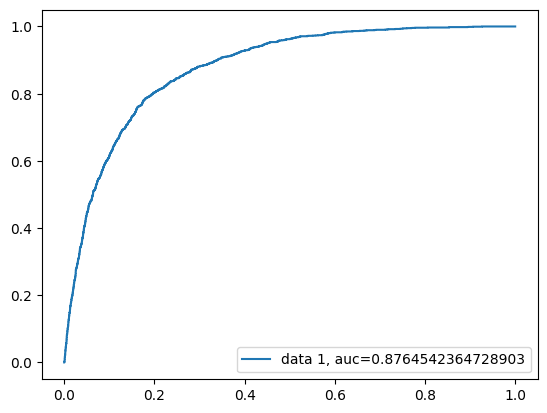

In [34]:
# print the roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [37]:

# display a visualisation of the decision tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns,
                                class_names=['no', 'yes'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph


AttributeError: 'LogisticRegression' object has no attribute 'tree_'